# Introduction
Created by: Bailey Stephens <br>
Creation date: 12/1/2021 <br>

The following notebook 

In [2]:
### Import necessary packages
### NOTE: Check for unused packages
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
import numpy as np
from numpy import asarray
import os
import matplotlib.pyplot as plt
import time
import random
import plotly.express as px

# readFile() function
We first define a function to read in our files. There are a handful of issues that need to be addressed with this data. Firstly, the creator of the data split the photos into train and test splits already, but they are incredibly unbalanced and I wish to be able to change this myself. So, both folders will be loaded into separate dataframes and then combined into one massive dataframe.

Secondly, each photo is initally ~400x400 = 160000 pixels. Considering the number of photos we have, it is impractical to use these photos at their original resolutions. Hence, the readFile function will have a resolution parameter (default 105x105) to allow the data to be changed to any desired resolution.

_Remark:_ To determine the ideal resolution, there is code written to load the data while iterating over different resolutions. It is commented out unless debugging. Graphing the load times vs resolution demonstrates an exponential relationship, so it is important to work with smaller resolutions until the code is finalized.

In [3]:
### Holds each letter in English alphabet
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
            'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

### Function with three return value
def readFile(directory, resolution = 105, train = True, sample_max=1000):
    
    """
    Reads in a file in the data directory specified, and returns a list of image
    arrays in a normalized, greyscale format
    
    Parameters
    directory: Directory where image data is stored
    resolution: The desired resolution of the picture data (defaults to 105x105)
    
    Returns
    tf: The total time it took to load the data
    images: List of arrays of greyscale images
    letters: The letters associated with each image
    """
    
    images = []        ### Holds each image as normalized, greyscale image
    letters = []       ### List of letters for each image
    
    ### Stores the start time of the function
    t0 = time.time()
    
    if train:
        ext = 'train/asl_alphabet_train/'
    else:
        ext = 'test/asl_alphabet_test/'
    
    for letter in alphabet:
    
        counter = 0
    
        ### Loops over every file in the specified directory
        for filename in os.listdir(directory + ext + letter + '/'):
        
            ### Loops over each .jpg image in directory
            if filename.endswith(".jpg") and counter < sample_max:
            
                ### Prints the filenames being processed
                print("Analyzing:", filename)
            
                ### Adds each photo's letter to letters list
                letters.append(filename[0])
            
                # load the RGB image and convert to numpy array
                img = Image.open(directory + ext + letter + '/' + filename)
                numpydata = asarray(img)
            
                ### Creates normalized, greyscale version of image and stores it in images list
                imgGray = Image.open(directory + ext + letter + '/' + filename).convert('L')
                imgGray = imgGray.resize((resolution, resolution))
                imgGray = asarray(imgGray)
                images.append(imgGray/255)
            
                ### Grabs the ASCII label from image name
                genLabel = filename[0]
                
                counter += 1
    
    ### Calculates the runtime of the function
    tf = time.time() - t0
    
    return tf, images, letters


### Defines data directory and desired resolution
dir = '/users/PAS1960/disteria10677/osc_classes/PHYSICS5680_OSU/materials/Project/Data/ASL Data/asl_alphabet_'
res = 105

### Loads both the 'train' and 'test' data
t1, imgs1, let1 = readFile(dir, resolution = res, train = True, sample_max=100)
#t2, imgs2, let2, val_set = readFile(dir, resolution = res, train = False)
print('Data loading time:', round(t1, 3), 'seconds')

### Combines train and test imgs and letters into combined lists
imgsAll = imgs1
letAll = let1

Analyzing: A1.jpg
Analyzing: A10.jpg
Analyzing: A100.jpg
Analyzing: A1000.jpg
Analyzing: A1001.jpg
Analyzing: A1002.jpg
Analyzing: A1003.jpg
Analyzing: A1004.jpg
Analyzing: A1005.jpg
Analyzing: A1006.jpg
Analyzing: A1007.jpg
Analyzing: A1008.jpg
Analyzing: A1009.jpg
Analyzing: A101.jpg
Analyzing: A1010.jpg
Analyzing: A1011.jpg
Analyzing: A1012.jpg
Analyzing: A1013.jpg
Analyzing: A1014.jpg
Analyzing: A1015.jpg
Analyzing: A1016.jpg
Analyzing: A1017.jpg
Analyzing: A1018.jpg
Analyzing: A1019.jpg
Analyzing: A102.jpg
Analyzing: A1020.jpg
Analyzing: A1021.jpg
Analyzing: A1022.jpg
Analyzing: A1023.jpg
Analyzing: A1024.jpg
Analyzing: A1025.jpg
Analyzing: A1026.jpg
Analyzing: A1027.jpg
Analyzing: A1028.jpg
Analyzing: A1029.jpg
Analyzing: A103.jpg
Analyzing: A1030.jpg
Analyzing: A1031.jpg
Analyzing: A1032.jpg
Analyzing: A1033.jpg
Analyzing: A1034.jpg
Analyzing: A1035.jpg
Analyzing: A1036.jpg
Analyzing: A1037.jpg
Analyzing: A1038.jpg
Analyzing: A1039.jpg
Analyzing: A104.jpg
Analyzing: A1040.jpg
An

Analyzing: D1087.jpg
Analyzing: D1088.jpg
Analyzing: E1.jpg
Analyzing: E10.jpg
Analyzing: E100.jpg
Analyzing: E1000.jpg
Analyzing: E1001.jpg
Analyzing: E1002.jpg
Analyzing: E1003.jpg
Analyzing: E1004.jpg
Analyzing: E1005.jpg
Analyzing: E1006.jpg
Analyzing: E1007.jpg
Analyzing: E1008.jpg
Analyzing: E1009.jpg
Analyzing: E101.jpg
Analyzing: E1010.jpg
Analyzing: E1011.jpg
Analyzing: E1012.jpg
Analyzing: E1013.jpg
Analyzing: E1014.jpg
Analyzing: E1015.jpg
Analyzing: E1016.jpg
Analyzing: E1017.jpg
Analyzing: E1018.jpg
Analyzing: E1019.jpg
Analyzing: E102.jpg
Analyzing: E1020.jpg
Analyzing: E1021.jpg
Analyzing: E1022.jpg
Analyzing: E1023.jpg
Analyzing: E1024.jpg
Analyzing: E1025.jpg
Analyzing: E1026.jpg
Analyzing: E1027.jpg
Analyzing: E1028.jpg
Analyzing: E1029.jpg
Analyzing: E103.jpg
Analyzing: E1030.jpg
Analyzing: E1031.jpg
Analyzing: E1032.jpg
Analyzing: E1033.jpg
Analyzing: E1034.jpg
Analyzing: E1035.jpg
Analyzing: E1036.jpg
Analyzing: E1037.jpg
Analyzing: E1038.jpg
Analyzing: E1039.jpg
A

Analyzing: I1.jpg
Analyzing: I10.jpg
Analyzing: I100.jpg
Analyzing: I1000.jpg
Analyzing: I1001.jpg
Analyzing: I1002.jpg
Analyzing: I1003.jpg
Analyzing: I1004.jpg
Analyzing: I1005.jpg
Analyzing: I1006.jpg
Analyzing: I1007.jpg
Analyzing: I1008.jpg
Analyzing: I1009.jpg
Analyzing: I101.jpg
Analyzing: I1010.jpg
Analyzing: I1011.jpg
Analyzing: I1012.jpg
Analyzing: I1013.jpg
Analyzing: I1014.jpg
Analyzing: I1015.jpg
Analyzing: I1016.jpg
Analyzing: I1017.jpg
Analyzing: I1018.jpg
Analyzing: I1019.jpg
Analyzing: I102.jpg
Analyzing: I1020.jpg
Analyzing: I1021.jpg
Analyzing: I1022.jpg
Analyzing: I1023.jpg
Analyzing: I1024.jpg
Analyzing: I1025.jpg
Analyzing: I1026.jpg
Analyzing: I1027.jpg
Analyzing: I1028.jpg
Analyzing: I1029.jpg
Analyzing: I103.jpg
Analyzing: I1030.jpg
Analyzing: I1031.jpg
Analyzing: I1032.jpg
Analyzing: I1033.jpg
Analyzing: I1034.jpg
Analyzing: I1035.jpg
Analyzing: I1036.jpg
Analyzing: I1037.jpg
Analyzing: I1038.jpg
Analyzing: I1039.jpg
Analyzing: I104.jpg
Analyzing: I1040.jpg
An

Analyzing: M1.jpg
Analyzing: M10.jpg
Analyzing: M100.jpg
Analyzing: M1000.jpg
Analyzing: M1001.jpg
Analyzing: M1002.jpg
Analyzing: M1003.jpg
Analyzing: M1004.jpg
Analyzing: M1005.jpg
Analyzing: M1006.jpg
Analyzing: M1007.jpg
Analyzing: M1008.jpg
Analyzing: M1009.jpg
Analyzing: M101.jpg
Analyzing: M1010.jpg
Analyzing: M1011.jpg
Analyzing: M1012.jpg
Analyzing: M1013.jpg
Analyzing: M1014.jpg
Analyzing: M1015.jpg
Analyzing: M1016.jpg
Analyzing: M1017.jpg
Analyzing: M1018.jpg
Analyzing: M1019.jpg
Analyzing: M102.jpg
Analyzing: M1020.jpg
Analyzing: M1021.jpg
Analyzing: M1022.jpg
Analyzing: M1023.jpg
Analyzing: M1024.jpg
Analyzing: M1025.jpg
Analyzing: M1026.jpg
Analyzing: M1027.jpg
Analyzing: M1028.jpg
Analyzing: M1029.jpg
Analyzing: M103.jpg
Analyzing: M1030.jpg
Analyzing: M1031.jpg
Analyzing: M1032.jpg
Analyzing: M1033.jpg
Analyzing: M1034.jpg
Analyzing: M1035.jpg
Analyzing: M1036.jpg
Analyzing: M1037.jpg
Analyzing: M1038.jpg
Analyzing: M1039.jpg
Analyzing: M104.jpg
Analyzing: M1040.jpg
An

Analyzing: Q1.jpg
Analyzing: Q10.jpg
Analyzing: Q100.jpg
Analyzing: Q1000.jpg
Analyzing: Q1001.jpg
Analyzing: Q1002.jpg
Analyzing: Q1003.jpg
Analyzing: Q1004.jpg
Analyzing: Q1005.jpg
Analyzing: Q1006.jpg
Analyzing: Q1007.jpg
Analyzing: Q1008.jpg
Analyzing: Q1009.jpg
Analyzing: Q101.jpg
Analyzing: Q1010.jpg
Analyzing: Q1011.jpg
Analyzing: Q1012.jpg
Analyzing: Q1013.jpg
Analyzing: Q1014.jpg
Analyzing: Q1015.jpg
Analyzing: Q1016.jpg
Analyzing: Q1017.jpg
Analyzing: Q1018.jpg
Analyzing: Q1019.jpg
Analyzing: Q102.jpg
Analyzing: Q1020.jpg
Analyzing: Q1021.jpg
Analyzing: Q1022.jpg
Analyzing: Q1023.jpg
Analyzing: Q1024.jpg
Analyzing: Q1025.jpg
Analyzing: Q1026.jpg
Analyzing: Q1027.jpg
Analyzing: Q1028.jpg
Analyzing: Q1029.jpg
Analyzing: Q103.jpg
Analyzing: Q1030.jpg
Analyzing: Q1031.jpg
Analyzing: Q1032.jpg
Analyzing: Q1033.jpg
Analyzing: Q1034.jpg
Analyzing: Q1035.jpg
Analyzing: Q1036.jpg
Analyzing: Q1037.jpg
Analyzing: Q1038.jpg
Analyzing: Q1039.jpg
Analyzing: Q104.jpg
Analyzing: Q1040.jpg
An

Analyzing: U1.jpg
Analyzing: U10.jpg
Analyzing: U100.jpg
Analyzing: U1000.jpg
Analyzing: U1001.jpg
Analyzing: U1002.jpg
Analyzing: U1003.jpg
Analyzing: U1004.jpg
Analyzing: U1005.jpg
Analyzing: U1006.jpg
Analyzing: U1007.jpg
Analyzing: U1008.jpg
Analyzing: U1009.jpg
Analyzing: U101.jpg
Analyzing: U1010.jpg
Analyzing: U1011.jpg
Analyzing: U1012.jpg
Analyzing: U1013.jpg
Analyzing: U1014.jpg
Analyzing: U1015.jpg
Analyzing: U1016.jpg
Analyzing: U1017.jpg
Analyzing: U1018.jpg
Analyzing: U1019.jpg
Analyzing: U102.jpg
Analyzing: U1020.jpg
Analyzing: U1021.jpg
Analyzing: U1022.jpg
Analyzing: U1023.jpg
Analyzing: U1024.jpg
Analyzing: U1025.jpg
Analyzing: U1026.jpg
Analyzing: U1027.jpg
Analyzing: U1028.jpg
Analyzing: U1029.jpg
Analyzing: U103.jpg
Analyzing: U1030.jpg
Analyzing: U1031.jpg
Analyzing: U1032.jpg
Analyzing: U1033.jpg
Analyzing: U1034.jpg
Analyzing: U1035.jpg
Analyzing: U1036.jpg
Analyzing: U1037.jpg
Analyzing: U1038.jpg
Analyzing: U1039.jpg
Analyzing: U104.jpg
Analyzing: U1040.jpg
An

Analyzing: X1082.jpg
Analyzing: X1083.jpg
Analyzing: X1084.jpg
Analyzing: X1085.jpg
Analyzing: X1086.jpg
Analyzing: X1087.jpg
Analyzing: X1088.jpg
Analyzing: Y1.jpg
Analyzing: Y10.jpg
Analyzing: Y100.jpg
Analyzing: Y1000.jpg
Analyzing: Y1001.jpg
Analyzing: Y1002.jpg
Analyzing: Y1003.jpg
Analyzing: Y1004.jpg
Analyzing: Y1005.jpg
Analyzing: Y1006.jpg
Analyzing: Y1007.jpg
Analyzing: Y1008.jpg
Analyzing: Y1009.jpg
Analyzing: Y101.jpg
Analyzing: Y1010.jpg
Analyzing: Y1011.jpg
Analyzing: Y1012.jpg
Analyzing: Y1013.jpg
Analyzing: Y1014.jpg
Analyzing: Y1015.jpg
Analyzing: Y1016.jpg
Analyzing: Y1017.jpg
Analyzing: Y1018.jpg
Analyzing: Y1019.jpg
Analyzing: Y102.jpg
Analyzing: Y1020.jpg
Analyzing: Y1021.jpg
Analyzing: Y1022.jpg
Analyzing: Y1023.jpg
Analyzing: Y1024.jpg
Analyzing: Y1025.jpg
Analyzing: Y1026.jpg
Analyzing: Y1027.jpg
Analyzing: Y1028.jpg
Analyzing: Y1029.jpg
Analyzing: Y103.jpg
Analyzing: Y1030.jpg
Analyzing: Y1031.jpg
Analyzing: Y1032.jpg
Analyzing: Y1033.jpg
Analyzing: Y1034.jpg
A

# Preparing the Data
For our N-shot algorithm, we need a 4D array of the following form: (# of unique letters, # of samples of each letter, resolution, resolution). For example, most of our data will have shape (26, 42, 105, 105). This means we have 26 letters, 42 samples of each letter, and each photo has a resolution of 105x105 pixels. The tricky part is that second dimension (the number of samples) since it must be consistent for each letter. So, we must limit ourselves to only use as many samples as the letter with the least samples has. The below cell counts the amount of occurrences of each letter, and then finds the letter with the least samples.

In [4]:
### Holds each letter in English alphabet
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
            'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

### Creates a dictionary with each English letter as a key
counts = {}
for letter in alphabet:
    counts[letter] = 0

### Counts the frequency of each letter in our data
for letter in alphabet:
    examples = []
    for i in range(len(let1)):
        if let1[i] == letter:
            counts[let1[i]] += 1

### Prints the letter with the least samples and saves the value for that key
print("Letter with least samples:", min(counts, key=counts.get))
minimum_count = counts[min(counts, key=counts.get)]

### Prints the counts dictionary
print()
print(counts)

Letter with least samples: A

{'A': 100, 'B': 100, 'C': 100, 'D': 100, 'E': 100, 'F': 100, 'G': 100, 'H': 100, 'I': 100, 'J': 100, 'K': 100, 'L': 100, 'M': 100, 'N': 100, 'O': 100, 'P': 100, 'Q': 100, 'R': 100, 'S': 100, 'T': 100, 'U': 100, 'V': 100, 'W': 100, 'X': 100, 'Y': 100, 'Z': 100}


The below section allows us to define the signal letter and create a split of our data accordingly.

In [5]:
SIGNAL_LETTERS = ['B', 'A', 'I', 'L', 'E', 'Y']     ### Letter we wish to train n-shot to recognize
X_train = []            ### List of signal photos
X_val = []              ### List of background photos

### Saves a minimum_count amount of each letter to X_all
for letter in alphabet:
    temp_list = []
    temp_count = minimum_count
    temp_iter = 0
    
    ### Runs while number of samples is less that of the minimum_count letter
    while int(temp_count) > 0:
        if letter == letAll[temp_iter]:
            temp_list.append(imgsAll[temp_iter])
            temp_count -= 1
        temp_iter += 1
        
    ### Appends list of images to signal or background list accordingly
    if letter not in SIGNAL_LETTERS:
        X_train.append(temp_list)
    else:
        X_val.append(temp_list)
        
### Converts X_train and X_val lists to numpy arrays
import numpy as np
X_train = np.array(X_train)
X_val = np.array(X_val)
print("X_train shape: ", X_train.shape)
print("X_val shape:   ", X_val.shape)

### Prints all images in train array (UNCOMMENT FOR RESULT)
#for i in range(42):
#    plt.figure()
#    f, axarr = plt.subplots() 
#        
#    axarr.imshow(X_train[0][i], cmap='gray', vmin=0, vmax=1)

X_train shape:  (20, 100, 105, 105)
X_val shape:    (6, 100, 105, 105)


_Remark:_ The below code is for graphing load times against resolution, it is commented out for convenience. A sample run is given below: (CHANGE GRAPH)

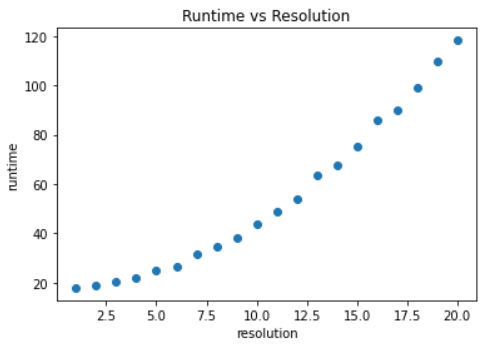

In [5]:
"""
times =[]          ### Holds the times for each data load
resolution = []    ### Holds the resolutions corresponding to these times

### Iterates over resolutions 10-200 in intervals of 10
for i in range(5, 300, 5):
    print("Running with resolution:", i)
    t1_temp, imgs1_temp, let1_temp = readFile(dir, resolution = i, train = True)
    t2_temp, imgs2_temp, let2_temp = readFile(dir, resolution = i, train = False)
    
    ### Adds runtimes and resolutions to respective lists
    times.append(t1_temp+t2_temp)
    resolution.append(i)

### Plots runtime as a function of resolution
plt.scatter(x=resolution, y=times)
plt.xlabel('resolution')
plt.ylabel('runtime')
plt.title('Runtime vs Resolution')
plt.show()
"""

'\ntimes =[]          ### Holds the times for each data load\nresolution = []    ### Holds the resolutions corresponding to these times\n\n### Iterates over resolutions 10-200 in intervals of 10\nfor i in range(5, 300, 5):\n    print("Running with resolution:", i)\n    t1_temp, imgs1_temp, let1_temp = readFile(dir, resolution = i, train = True)\n    t2_temp, imgs2_temp, let2_temp = readFile(dir, resolution = i, train = False)\n    \n    ### Adds runtimes and resolutions to respective lists\n    times.append(t1_temp+t2_temp)\n    resolution.append(i)\n\n### Plots runtime as a function of resolution\nplt.scatter(x=resolution, y=times)\nplt.xlabel(\'resolution\')\nplt.ylabel(\'runtime\')\nplt.title(\'Runtime vs Resolution\')\nplt.show()\n'

# Visualizing the Data
Since we have many degrees of freedom, it is useful to understand the structure of our data. Our dataset is labeled, so we can count the frequency of each letter in our data. A dictionary containing each possible letter label is given below, and the frequncy is counted by iterating over each row in the dataframe.

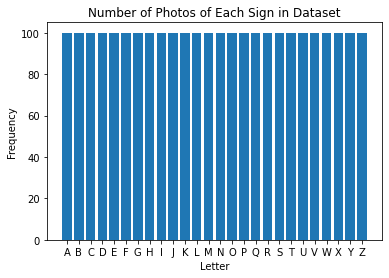

In [6]:
### Plots a histogram of the frequency of each letter
plt.bar(list(counts.keys()), counts.values())
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.title('Number of Photos of Each Sign in Dataset')
plt.show()

As we can see, this dataset is fairly small, even containing small some letters only ~40 times. Hence, we must consider an A.I. model that will work with a small amount of data. This is ultimately why an n-shot algorithm is preferrable since it only requires a small amount of training images.

# Making the Model
In order to make an effective one-shot learning algorithm, we need to set up a Convolutional Neural Network (CNN). The CNN model below is from the linked paper.

In [7]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense, Input
from tensorflow.keras.initializers import glorot_uniform, RandomNormal

from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras import layers
import numpy as np


def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),
                     bias_initializer=RandomNormal(mean=0.5, stddev=0.01), 
                     kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),
                     bias_initializer=RandomNormal(mean=0.5, stddev=0.01), 
                     kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),
                     bias_initializer=RandomNormal(mean=0.5, stddev=0.01),                      
                     kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),
                     bias_initializer=RandomNormal(mean=0.5, stddev=0.01),  
                     kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),
                     bias_initializer=RandomNormal(mean=0.5, stddev=0.01)
                   ))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid',
                       bias_initializer=RandomNormal(mean=0.5, stddev=0.01))(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

2.6.0
2.6.0


In [8]:
model = get_siamese_model((res, res, 1))
optimizer = Adam(learning_rate = 0.00005)
model.compile(loss="binary_crossentropy",optimizer=optimizer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 4096)         38947648    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 4096)         0           sequential[0][0]             

### get_batch function
In order to train our CNN, we need to be able to feed it batches of data. These batches should contain pairs of images, half of which are different versions of the same letter, the other half of which are mismatching letters. Note that the matching pairs of letters must be different photos (it would be pretty easy to tell if two images were completely identical). The mismatching pairs severely limit our max number of batches, though, as we only have 20 unique letters in the training data.

In [9]:
import random
import numpy as np
from sklearn.utils import shuffle

### Function with two return values
def get_batch(batch_size, use_test_data=False):
    
    """
    Generates several pairs of images, half of which are different versions
    of the same character, half of which are mismatching characters
    
    Parameters
    batch_size: Number of pairs to be generated
    use_test: Boolean indicating whether to generate pairs from train or test data
    
    Returns
    labels: List of labels for matching / mismatching photos
    all_images: List of batch_size pairs of images
    
    Remark: If it is not possible to make the specified batch, it returns a set of zero-matrices
    """
    
    ### Gets dimensions of test / train data
    if use_test_data:
        n_letters, n_photos, w, h = X_val.shape
    else:
        n_letters, n_photos, w, h = X_train.shape
    
    ### Generates randomized lists for indexing and sampling photos
    letters = list(range(n_letters))
    photos = list(range(n_photos))
    random.shuffle(letters)
    random.shuffle(photos)
    
    ### Stores the half_batch (ex: 11//2 = 5, 6//2 = 3)
    half_batch = batch_size//2
    
    ### Stores labels for matching / mismatching photos
    ### NOTE: A value of 1 is matching, 0 is mismatching
    labels = np.zeros((batch_size,))
    
    ### Stores initial images
    init_images = np.zeros((batch_size, w, h))
    
    ### Stores images to be compared against initial images
    comp_images = np.zeros((batch_size, w, h))
    
    ### Only runs if batch_size is possible
    if half_batch < n_letters//2:
        
        ### Since letters and photos are randomized, we can just take half_batch
        ### many letter indices and photo indices to find random, matching photos
        first_set_letters = letters[0:half_batch]
        first_set_indices = photos[0]
        second_set_letters = letters[0:half_batch]
        second_set_indices = photos[1]
        
        ### Generates pairs of matching images from test or train data as specified
        if use_test_data:
            init_images[0:half_batch] = X_val[first_set_letters, first_set_indices, :, :]
            comp_images[0:half_batch] = X_val[second_set_letters, second_set_indices, :, :]
        else:
            init_images[0:half_batch] = X_train[first_set_letters, first_set_indices, :, :]
            comp_images[0:half_batch] = X_train[second_set_letters, second_set_indices, :, :]
        
        ### Adds labels for matching images
        labels[0:half_batch] = 1
            
        ### These variables are used for the same thing as above, but are just
        ### overwritten for convenience with new values
        ### NOTE: half_batch shift used in second_set_letters to prevent photos
        ###       from potentially matching
        first_set_letters = letters[half_batch:batch_size]
        first_set_indices = photos[0]
        second_set_letters = letters[batch_size:batch_size + half_batch]
        second_set_indices = photos[1]
    
        ### Generates pairs of mismatching images from test or train data as specified
        if use_test_data:
            init_images[half_batch:batch_size] = X_val[first_set_letters, first_set_indices, :, :]
            comp_images[half_batch:batch_size] = X_val[second_set_letters, second_set_indices, :, :]
        else:
            init_images[half_batch:batch_size] = X_train[first_set_letters, first_set_indices, :, :]
            comp_images[half_batch:batch_size] = X_train[second_set_letters, second_set_indices, :, :]
        
        ### Adds labels for mismatching images
        labels[half_batch:batch_size] = 0
        
        ### Reshapes lists of images into proper forms
        init_images = init_images.reshape(batch_size, w, h,1)
        comp_images = comp_images.reshape(batch_size, w, h,1)
        
    ### Shuffles labels and images using the same seed, then combined images into pairs
    labels, init_images, comp_images = shuffle(labels, init_images, comp_images)
    all_images = [init_images, comp_images]
    
    return all_images, labels

[0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


/fs/ess/PAS2038/PHYSICS5680_OSU/jupyter/lib64/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

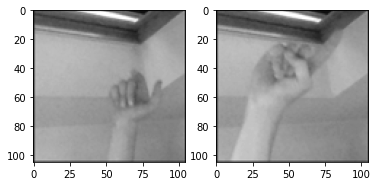

<Figure size 432x288 with 0 Axes>

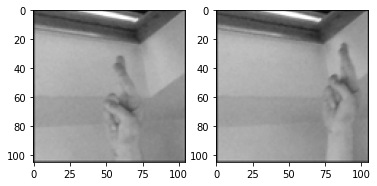

<Figure size 432x288 with 0 Axes>

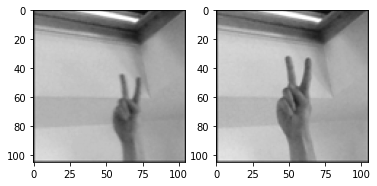

<Figure size 432x288 with 0 Axes>

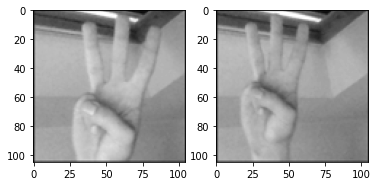

<Figure size 432x288 with 0 Axes>

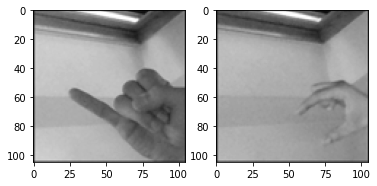

<Figure size 432x288 with 0 Axes>

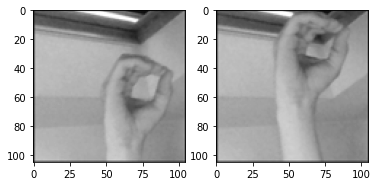

<Figure size 432x288 with 0 Axes>

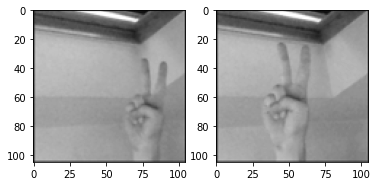

<Figure size 432x288 with 0 Axes>

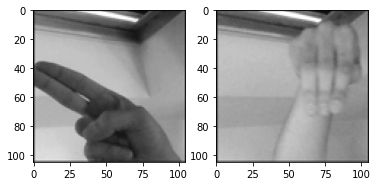

<Figure size 432x288 with 0 Axes>

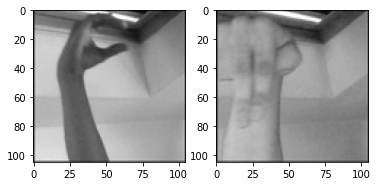

<Figure size 432x288 with 0 Axes>

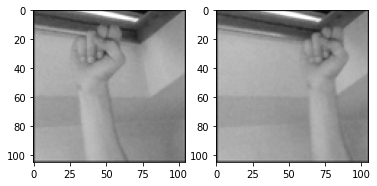

<Figure size 432x288 with 0 Axes>

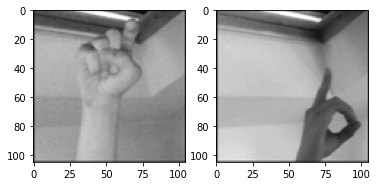

<Figure size 432x288 with 0 Axes>

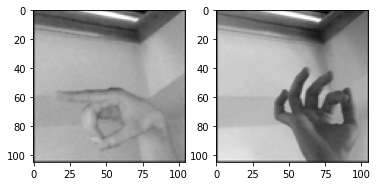

In [10]:
### Calls get_batch() and stores the pairs and targets in p and t
p, t = get_batch(12 ,use_test_data=False)

### Prints the target list
print(t)

signalCount=2         ### Counts how many signal graphs need to be plotted
backgroundCount=2     ### Counts how many background graphs need to be plotted

### Iterates over each target value
for i in range(len(t)):
    
    ### Checks if current pair is signal and needs to be plotted
    if t[i] == 1 and signalCount > 0:
        
        plt.figure()
        f, axarr = plt.subplots(1,2) 
        
        axarr[0].imshow(p[0][i], cmap='gray', vmin=0, vmax=1)
        axarr[1].imshow(p[1][i], cmap='gray', vmin=0, vmax=1)
        #signalCount -= 1
        
    ### Checks if current pair is background and needs to be plotted
    if t[i]==0 and backgroundCount > 0:
        
        plt.figure()
        f, axarr = plt.subplots(1,2) 
        
        axarr[0].imshow(p[0][i], cmap='gray', vmin=0, vmax=1)
        axarr[1].imshow(p[1][i], cmap='gray', vmin=0, vmax=1)
        #backgroundCount -= 1

### make_oneshot() function
The make_oneshot() function is similar to the get_batch() function in many ways. While this function also makes N number of pairs of photos, it does not have the half-matching, half-mismatching form. Instead, one image is chosen as a reference photo, a single different photo of the same letter is then matched paired with it, and N-1 images of different letters are also paired with the reference. This results in a list of N pairs with one matching and N-1 mismatching images.

In [11]:
### Function with two return values
def make_oneshot(N, use_test_data=False):
    
    """
    Chooses one photo as a reference photo, and N other photos are paired up with
    that same photo. Exactly one of the pairs are different photos of the same
    letter, whereas N-1 of them are mismatching photos
    
    Parameters
    N: Number of pairs to be generated
    use_test: Boolean indicating whether to generate pairs from train or test data
    
    Returns
    pairs: List of labels for matching / mismatching photos
    labels: List of batch_size pairs of images
    """
    
    ### Gets dimensions of test / train data
    if use_test_data:
        n_letters, n_photos, w, h = X_val.shape
    else:
        n_letters, n_photos, w, h = X_train.shape
    
    ### Generates randomized lists for indexing and sampling photos
    letters = list(range(n_letters))
    photos = list(range(n_photos))
    random.shuffle(letters)
    random.shuffle(photos)
    
    ### Stores labels for matching / mismatching photos
    ### NOTE: A value of 1 is matching, 0 is mismatching
    labels = np.zeros((N,))
    
    ### Stores initial images
    ref_images = np.zeros((N, w, h))
    
    ### Stores images to be compared against reference image
    comp_images = np.zeros((N, w, h))
    
    ### Determines indices of the reference photo and adjusts label to be matching
    ref_image_letter = letters[0]
    ref_image_photo = photos[0]
    labels[0] = 1
    
    ### Determines indices of the comparison photos and adjusts labels to be mismatching
    comp_image_letters = letters[0:N]
    comp_image_indices = photos[1:N+1]
    labels[1:N] = 0
    
    ### Adds reference and comparison photos to their corresponding lists
    if use_test_data:
        ref_images[0:N] = X_val[ref_image_letter, ref_image_photo, :, :]
        comp_images[0:N] = X_val[comp_image_letters, comp_image_indices, :, :]
    else:
        ref_images[0:N] = X_train[ref_image_letter, ref_image_photo, :, :]
        comp_images[0:N] = X_train[comp_image_letters, comp_image_indices, :, :]
    
    ### Reshapes lists into proper shapes
    ref_images = ref_images.reshape(N, w, h, 1)
    comp_images = comp_images.reshape(N, w, h, 1)
    
    ### Makes a list of pairs of images
    all_images = [ref_images, comp_images]

    return all_images, labels

[1. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

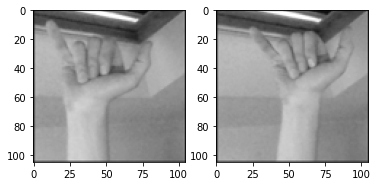

<Figure size 432x288 with 0 Axes>

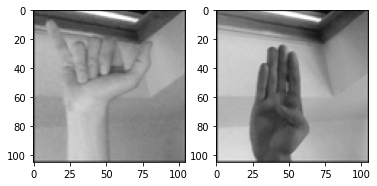

<Figure size 432x288 with 0 Axes>

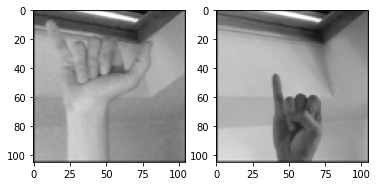

<Figure size 432x288 with 0 Axes>

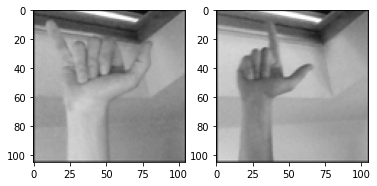

<Figure size 432x288 with 0 Axes>

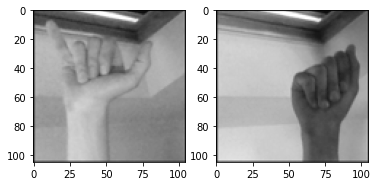

<Figure size 432x288 with 0 Axes>

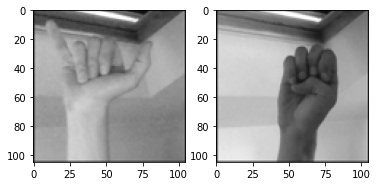

In [12]:
### Calls make_oneshot() and stores the pairs and targets in p and t
p, t = make_oneshot(6, use_test_data=True)

### Prints the targets list
print(t)

### Iterates over each pair of images and plots them
for i in range(len(t)):
        
    plt.figure()
    f, axarr = plt.subplots(1,2)    
    
    axarr[0].imshow(p[0][i], cmap='gray', vmin=0, vmax=1)
    axarr[1].imshow(p[1][i], cmap='gray', vmin=0, vmax=1)
    signalCount -= 1

In [13]:
# Hyper parameters
evaluate_every = 20 # interval for evaluating on one-shot tasks
batch_size = 12
n_iter = 1000 # No. of training iterations
N_way = 6 # how many classes for testing one-shot tasks
n_val = 50 # how many one-shot tasks to validate on
best = -1
NAME = 'revised_v4_attempt'

trainLosses = []
validationLosses = []

# Now start training
print("Starting training process!")
print("-------------------------------------")

### Used for tracking time during training
t_start = time.time()

### Iterates n_iter times
for i in range(1, n_iter+1):
    print("i=",i)

    # Get a new batch to test on
    (inputs,targets) = get_batch(batch_size, use_test_data=False)
    test_images = inputs[0]
    support_images = inputs[1]
    #print("test_images.shape",test_images.shape)
    #print("support_images.shape",support_images.shape)
    #print("targets.shape",targets)
    lossTrain = model.train_on_batch(inputs, targets)
    trainLosses.append(lossTrain)
    
    (inputs,targets) = get_batch(batch_size, use_test_data=True)
    test_images = inputs[0]
    support_images = inputs[1]
    #print("test_images.shape",test_images.shape)
    #print("support_images.shape",support_images.shape)
    #print("targets.shape",targets)
    lossVal = model.test_on_batch(inputs, targets)
    validationLosses.append(lossVal)

    # Every so many iterations, check the training and validation performance
    if i % evaluate_every == 0:
        print("i=",i)
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(lossTrain))
        print("Validation Loss: {0}".format(lossVal))

        # Now get N-way test results for train and validation sets
        n_correct_train = 0
        n_correct_val = 0
        for testTrials in range(n_val):

            # First check training performance
            inputs, targets = make_oneshot(N_way,use_test_data=False)
            probs = model.predict(inputs)
            
            if np.argmax(probs) == np.argmax(targets):
                n_correct_train += 1

            # Next check validation performace
            inputs, targets = make_oneshot(N_way,use_test_data=True)
            probs = model.predict(inputs)

            if np.argmax(probs) == np.argmax(targets):
                n_correct_val += 1
        train_acc = (100.0 * n_correct_train / n_val)
        print("     training perf",train_acc)
        val_acc = (100.0 * n_correct_val / n_val)
        print("   validation perf",val_acc)
        
        
        
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc
            model.save('models/{runname}_siam_model.{run}_{perf}.h5'.format(runname=NAME, run=i, perf=val_acc))

print("Done!")

Starting training process!
-------------------------------------
i= 1
i= 2


KeyboardInterrupt: 

In [ ]:
x = [i for i in range(len(validationLosses))]

plt.figure()
f, axarr = plt.subplots()    

plt.plot(x, validationLosses, label='Validation Loss')
plt.plot(x, trainLosses, label='Training Loss')
plt.legend()

In [22]:
# Code developed by Dirk Colbry
# This code snipit tries to read from your computer's camera.  It is not fully tested so it may not work for everyone.
#
from IPython.display import HTML

main_text = """
<video id="video" width="320" height="240" autoplay></video>
<button id="snap">Snap Photo</button>
<canvas id="canvas" width="320" height="240"></canvas>

<script>
// Grab elements, create settings, etc.
var video = document.getElementById('video');

// Get access to the camera!
if(navigator.mediaDevices && navigator.mediaDevices.getUserMedia) {
    // Not adding `{ audio: true }` since we only want video now
    navigator.mediaDevices.getUserMedia({ video: true }).then(function(stream) {
        //video.src = window.URL.createObjectURL(stream);
        //video.play();
        video.srcObject=stream;
        video.play();
    });
}

// Elements for taking the snapshot
var canvas = document.getElementById('canvas');
var context = canvas.getContext('2d');
var video = document.getElementById('video');

// Trigger photo take
document.getElementById("snap").addEventListener("click", function() {
	context.drawImage(video, 0, 0, 320, 240);
    var myCanvas = document.getElementById('canvas');
    var image = myCanvas.toDataURL("image/png");
    IPython.notebook.kernel.execute("print('testing')")
    IPython.notebook.kernel.execute("image = '" + image + "'")
});
</script>

"""
HTML(main_text)

In [15]:
from PIL import Image
import base64
import io

pil_im = Image.open(io.BytesIO(base64.b64decode(image.split(',')[1])))
pil_im

imgGray = pil_im.convert('L')
imgGray = imgGray.resize((105, 105))
imgGray = asarray(imgGray)
imgGray = imgGray/255

In [ ]:
"""
def get_letter(photo):
    
    num_photos = 26
    
    w, h = photo.shape
    
    ### Stores initial images
    ref_images = np.zeros((num_photos, w, h))
    
    ### Stores images to be compared against reference image
    comp_images = np.zeros((num_photos, w, h))
        
    ref_images[0:num_photos] = photo
    comp_images[0:num_photos] = val_set[0:num_photos]
    
    ### Reshapes lists into proper shapes
    ref_images = ref_images.reshape(num_photos, w, h, 1)
    comp_images = comp_images.reshape(num_photos, w, h, 1)
    
    ### Makes a list of pairs of images
    all_images = [ref_images, comp_images]

    predictions = model.predict(all_images,)
    predictions = list(predictions)
    
    max_value = max(predictions)
    max_index = predictions.index(max_value)
    
    #probs = []
    #for i in predictions:
    #    probs.append(float(i))
        
    #for i, j in zip(alphabet, probs):
    #    print(str(i) + ": " + str(round(j * 100, 2)))
    #print(probs)
    
    #print('Predicted Letter is:', alphabet[max_index])
    
    #df = px.data.tips()
    # Here we use a column with categorical data
    #fig = px.histogram(x=alphabet, y=probs)
    #fig.show()
"""

In [11]:
from tensorflow.keras.models import load_model

t0 = time.time()
#model = load_model("/fs/scratch/PAS1759/hughes/siamese/models/siam_model.17600.h5")
model = load_model("/users/PAS1960/disteria10677/osc_classes/PHYSICS5680_OSU/materials/Project/models/JOB_FINAL_attempt_siam_model.38680_54.0.h5")
print("Model load time:", time.time()-t0)

Model load time: 6.186633586883545


In [ ]:
#for i in X_classification:
#    plt.figure()
#    f, axarr = plt.subplots() 
#        
#    axarr.imshow(i, cmap='gray', vmin=0, vmax=1)

#get_letter(imgGray)
ind = 0
#print(imgsAll[ind][0])

print(imgsAll[ind][0])

#get_letter(imgsAll[ind][0])

In [12]:
sample_max = 100
imgsAllArray = []

tempIter = 0
for i in range(len(alphabet)):
    tempList = []
    for j in range(sample_max):
        tempList.append(imgsAll[tempIter])
        tempIter += 1
    imgsAllArray.append(tempList)

imgsAllArray = np.array(imgsAllArray)
print(imgsAllArray.shape)

#for i in range(len(alphabet)):
#    print("Testing Letter:", alphabet[i])
#    
#    tempPhotos = list(imgsAllArray[i])
#    
#    for j in range(LET_TESTS):
#        img = random.choice(tempPhotos)

(26, 100, 105, 105)


In [13]:
val_set = []

for i in range(len(alphabet)):
    val_set.append(random.choice(imgsAllArray[i]))

In [19]:
def get_letter(photo):
    
    num_photos = 26
    
    w, h = photo.shape
    
    ### Stores initial images
    ref_images = np.zeros((num_photos, w, h))
    
    ### Stores images to be compared against reference image
    comp_images = np.zeros((num_photos, w, h))
        
    ref_images[0:num_photos] = photo
    comp_images[0:num_photos] = val_set[0:num_photos]
    
    ### Reshapes lists into proper shapes
    ref_images = ref_images.reshape(num_photos, w, h, 1)
    comp_images = comp_images.reshape(num_photos, w, h, 1)
    
    ### Makes a list of pairs of images
    all_images = [ref_images, comp_images]

    predictions = model.predict(all_images,)
    predictions = list(predictions)
    
    max_value = max(predictions)
    max_index = predictions.index(max_value)
    
    #print(list(predictions))
    #
    #probs = []
    #for i in predictions:
    #    probs.append(float(i))
        
    #for i, j in zip(alphabet, probs):
    #    print(str(i) + ": " + str(round(j * 100, 2)))
    #print(probs)
    
    return max_index
    
    #df = px.data.tips()
    # Here we use a column with categorical data
    #fig = px.histogram(x=alphabet, y=probs)
    #fig.show()
    
alphabet[get_letter(imgGray)]

'F'

In [20]:
LET_TESTS = 100
confusion_matrix = np.zeros((26, 26))

for i in range(len(alphabet)):
    
    tempList = []
    
    for j in range(len(alphabet)):
        tempList.append([0])
    
    t0 = time.time()
    print("ANALYZING:", alphabet[i])
    for j in range(LET_TESTS):
        letInd = get_letter(random.choice(imgsAllArray[i]))
        tempList[letInd][0] += 1
        confusion_matrix[i][letInd] += 1
    print("   runtime:", time.time() - t0)

ANALYZING: A
   runtime: 95.74199390411377
ANALYZING: B
   runtime: 95.49795031547546
ANALYZING: C
   runtime: 94.90246963500977
ANALYZING: D
   runtime: 94.7025351524353
ANALYZING: E
   runtime: 94.89806342124939
ANALYZING: F
   runtime: 95.69572138786316
ANALYZING: G
   runtime: 95.10325479507446
ANALYZING: H
   runtime: 95.29871010780334
ANALYZING: I
   runtime: 94.90157103538513
ANALYZING: J
   runtime: 95.40476036071777
ANALYZING: K
   runtime: 97.59030818939209
ANALYZING: L
   runtime: 97.50031352043152
ANALYZING: M
   runtime: 97.59829258918762
ANALYZING: N
   runtime: 97.49927568435669
ANALYZING: O
   runtime: 96.30023121833801
ANALYZING: P
   runtime: 94.79900312423706
ANALYZING: Q
   runtime: 95.00178527832031
ANALYZING: R
   runtime: 95.00062942504883
ANALYZING: S
   runtime: 95.39820075035095
ANALYZING: T
   runtime: 96.00007843971252
ANALYZING: U
   runtime: 97.69365072250366
ANALYZING: V
   runtime: 97.71414947509766
ANALYZING: W
   runtime: 98.08747982978821
ANALYZING: X

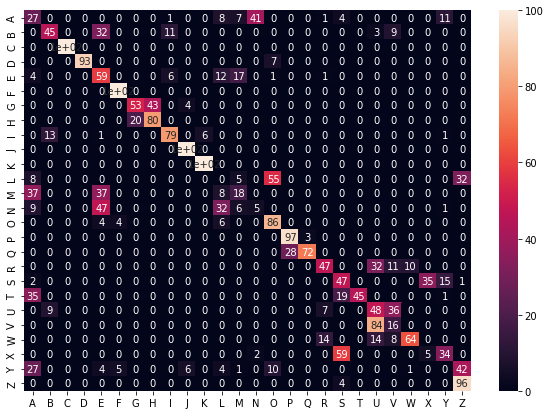

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in alphabet],
                  columns = [i for i in alphabet])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('confusion_matrix')